In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 0. Описание задачи
Данный датасет представляет собой информацию о 114 000 песнях. Для каждой песни указана ее популярность, продолжительность, жанр, исполнитель и так далее.

Цель — по признакам песни предсказать её популярность. Это задача регрессии.

# 1. Прочитать данные

In [3]:
data = pd.read_csv('dataset.csv')
data = data.drop(columns=['number'])
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Набор данных содержит следующие поля:
* track_id: Spotify ID песни
* artists: Имя исполнителя
* album_name: Название альбома
* track_name: Название песни
* popularity: Популярность песни (0 - 100)
* duration_ms: Продолжительность в милисекундах
* explicit: Содержит ли песня откровенное содержание
* danceability: Танцевальность песни (0,0 - 1,0)
* key: Тональность песни
* loudness: Громкость в дБ
* mode: Модальность (мажорная или минорная)
* speechiness: Разборчивость определяет наличие произносимых слов в треке. Чем больше запись похожа исключительно на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1.0.
* acousticness: Показатель достоверности от 0,0 до 1,0 для определения того, является ли трек акустическим
* valence: Показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую песней
* tempo: Общий предполагаемый темп трека в ударах в минуту (BPM). 
* time_signature: Приблизительная временная подпись. Временная подпись (измеритель) - это условное обозначение, указывающее, сколько ударов приходится на каждый такт (или меру). 
* track_genre: Жанр песни

# 2. Разведочный анализ данных (EDA)

In [5]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


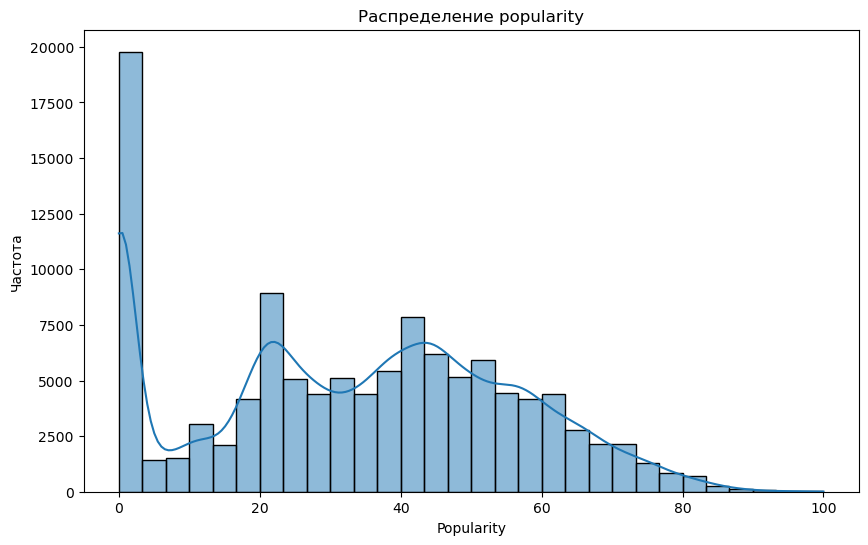

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title('Распределение popularity')
plt.xlabel('Popularity')
plt.ylabel('Частота')
plt.show()

Гистограмма показывает, что большинство треков имеют низкую популярность (0–20), а количество треков с высокой популярностью (выше 60) резко уменьшается.

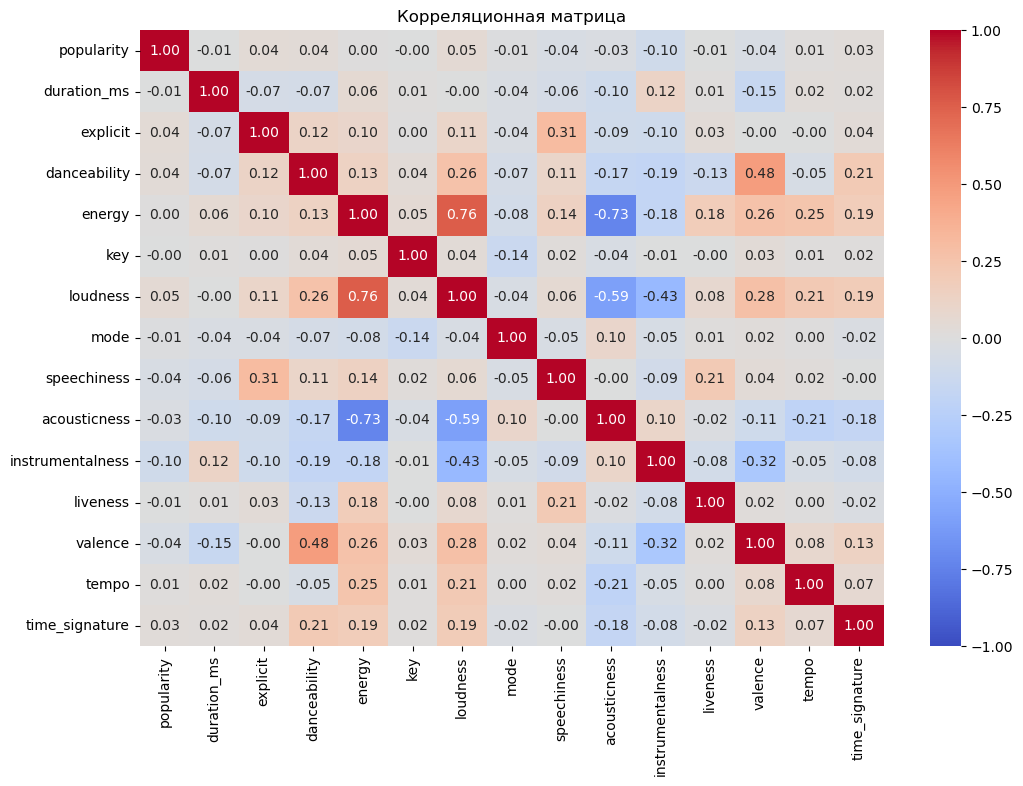

In [7]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')
plt.show()

По матрице корреляции видно, что признак energy сильно коррелирует с другими (acousticness и loudness) и его можно убрать в дальнейшем.

Построим некоторые диаграммы рассеивания

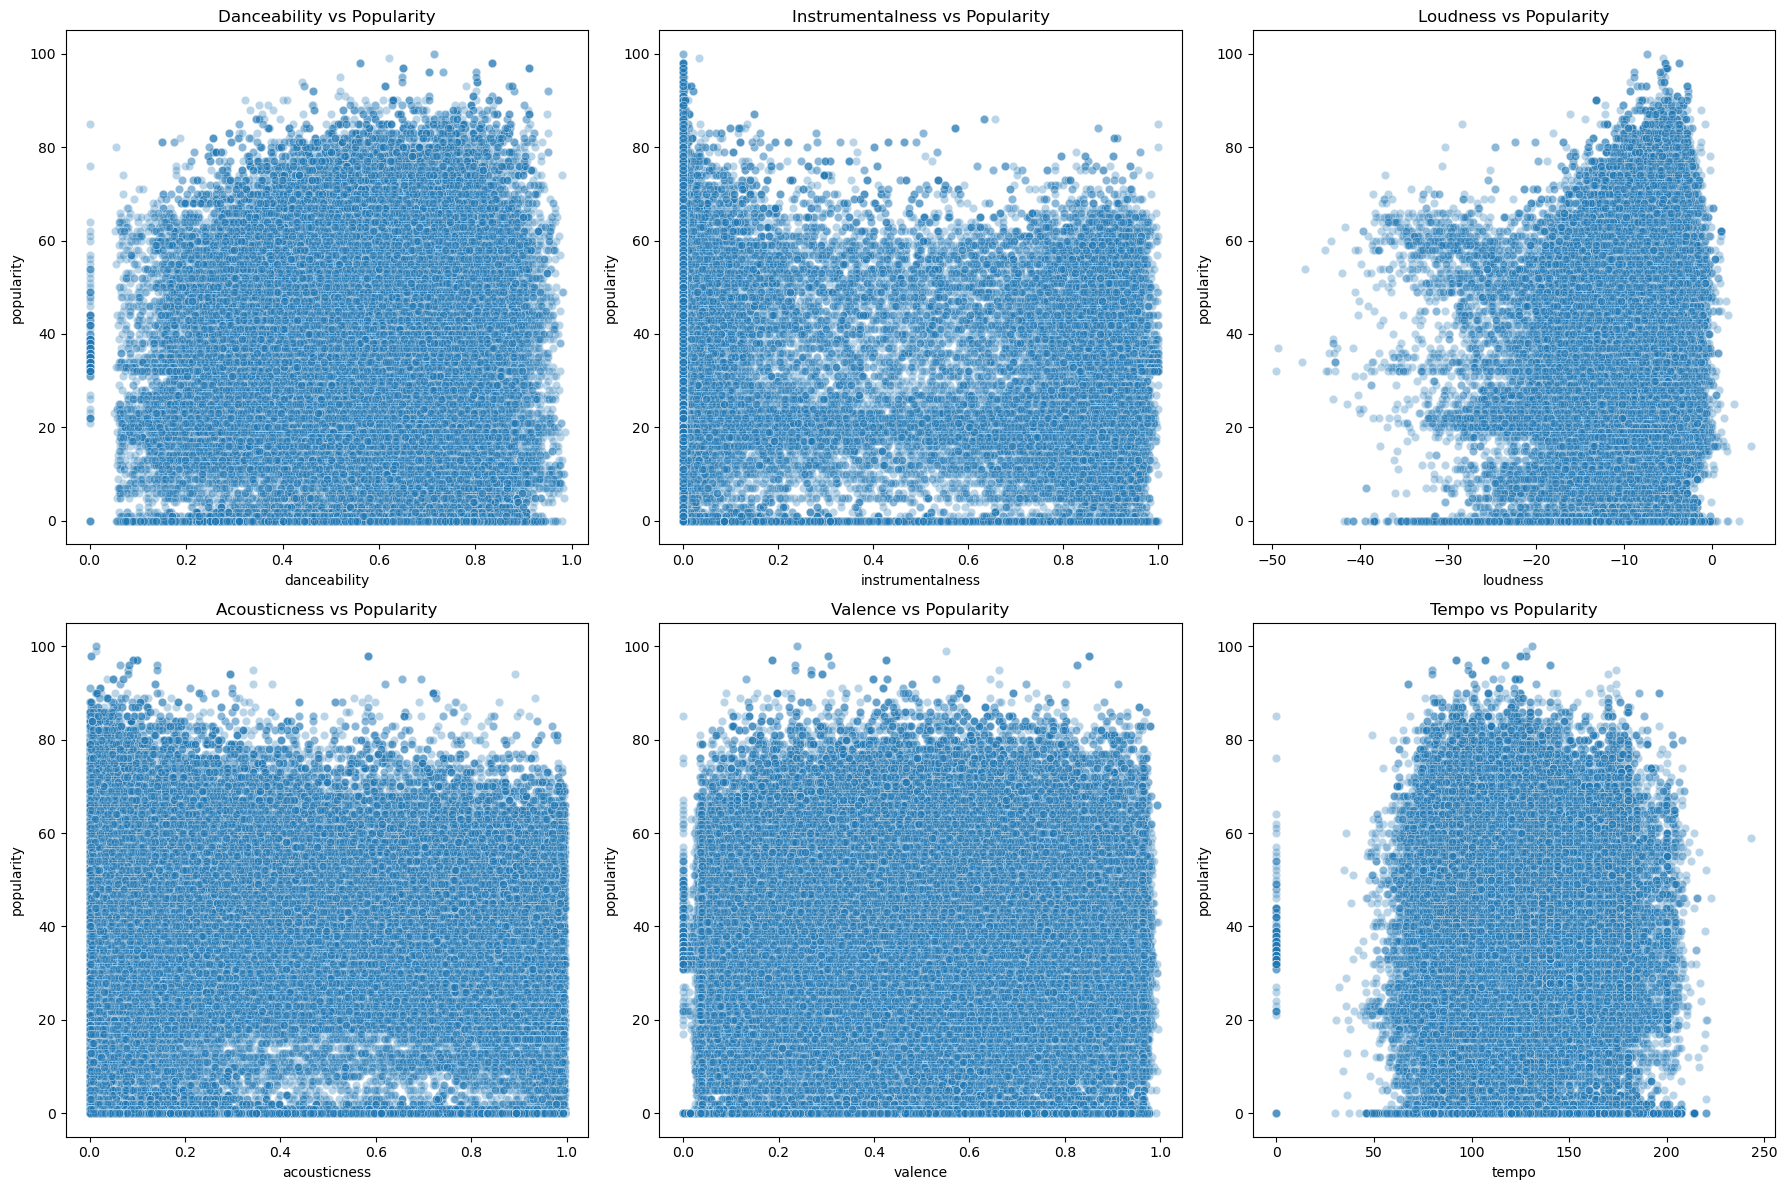

In [8]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.scatterplot(x=data['danceability'], y=data['popularity'], alpha=0.3)
plt.title('Danceability vs Popularity')

plt.subplot(2, 3, 2)
sns.scatterplot(x=data['instrumentalness'], y=data['popularity'], alpha=0.3)
plt.title('Instrumentalness vs Popularity')

plt.subplot(2, 3, 3)
sns.scatterplot(x=data['loudness'], y=data['popularity'], alpha=0.3)
plt.title('Loudness vs Popularity')

plt.subplot(2, 3, 4)
sns.scatterplot(x=data['acousticness'], y=data['popularity'], alpha=0.3)
plt.title('Acousticness vs Popularity')

plt.subplot(2, 3, 5)
sns.scatterplot(x=data['valence'], y=data['popularity'], alpha=0.3)
plt.title('Valence vs Popularity')

plt.subplot(2, 3, 6)
sns.scatterplot(x=data['tempo'], y=data['popularity'], alpha=0.3)
plt.title('Tempo vs Popularity')

plt.tight_layout()
plt.show()


# 3. Обработка пропущенных значений

In [8]:
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

В данном датасете пропущены значения только в строковых признаках, заменим в них пустые на Unknown

In [26]:
data['artists'].fillna("Unknown", inplace=True)
data['album_name'].fillna("Unknown", inplace=True)
data['track_name'].fillna("Unknown", inplace=True)

# 4. Обработка выбросов

In [9]:
outliers_features = data.select_dtypes(include=[np.number]).columns.tolist()

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

for feature in outliers_features:
    outliers = find_outliers(data[feature])
    print(f"Выбросы в {feature}: {outliers.count()} шт.")

Выбросы в popularity: 2 шт.
Выбросы в duration_ms: 5617 шт.
Выбросы в danceability: 620 шт.
Выбросы в energy: 0 шт.
Выбросы в key: 0 шт.
Выбросы в loudness: 6173 шт.
Выбросы в mode: 0 шт.
Выбросы в speechiness: 13211 шт.
Выбросы в acousticness: 0 шт.
Выбросы в instrumentalness: 25246 шт.
Выбросы в liveness: 8642 шт.
Выбросы в valence: 0 шт.
Выбросы в tempo: 617 шт.
Выбросы в time_signature: 12157 шт.


Можно заметить, что существую выбросы в датасете, заменим их на медиану

Заметим explicit - bool признак, так что его не будем трогать

In [10]:
def replace_outliers_with_median(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = data[feature].median()

    data[feature] = data[feature].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )

    return data

outliers_features = ['duration_ms', 'danceability', 'loudness', 'speechiness',
                      'instrumentalness', 'liveness', 'tempo', 'time_signature']

for feature in outliers_features:
    data = replace_outliers_with_median(data, feature)

data.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-7.004,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,4.0,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


# 5. Обработка категориальных признаков

Удалим столбец energy, исходя из анализа корреляционной матрицы

In [11]:
data = data.drop(columns=['energy'])

В датасете есть 1 категориальный признак track_genre (жанр), обработаем его и вместе с ним заменим bool значение признака explicit на числовое

In [12]:
categorical_features = ['track_genre']
bool_feature = ['explicit']

encoder = OneHotEncoder(sparse_output=False, drop='first')
genre_encoded = encoder.fit_transform(data[categorical_features])

genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(categorical_features))

data['explicit'] = data['explicit'].astype(int)

data_processed = data.drop(categorical_features, axis=1)
data_processed = pd.concat([data_processed, genre_encoded_df], axis=1)

data_processed.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,0,0.676,1,-6.746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,0,0.420,1,-17.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,0,0.438,0,-9.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,0,0.266,0,-7.004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,0,0.618,2,-9.681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Нормализация параметров

In [13]:
numeric_features = data_processed.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()

data_processed[numeric_features] = scaler.fit_transform(data_processed[numeric_features])

data_processed[numeric_features].head()

,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.782627,0.260637,-0.305767,0.627887,-1.210442,0.190371,-1.326281,3.242119,-0.850202,-0.257050,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
1,0.975633,-1.044905,-0.305767,-0.883376,-1.210442,-2.994763,0.753988,0.795602,1.831732,-0.256745,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
2,1.065299,-0.058919,-0.305767,-0.777115,-1.491343,-0.716978,0.753988,0.040007,-0.315499,-0.257118,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
3,1.692961,-0.202156,-0.305767,-1.792494,-1.491343,0.112025,0.753988,-0.671574,1.774593,-0.252366,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072
4,2.186125,-0.251764,-0.305767,0.285491,-0.929541,-0.700884,0.753988,-0.073699,0.463399,-0.257118,...,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072,-0.094072


# 7. Создание обучающей и тестовой выборок

In [14]:
X = data_processed[numeric_features].drop('popularity', axis=1)
y = data_processed['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Линейная регрессия

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_lr = lr_model.predict(X_train)
y_test_lr = lr_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_lr)
r2_train = r2_score(y_train, y_train_lr)

mse_test = mean_squared_error(y_test, y_test_lr)
r2_test = r2_score(y_test, y_test_lr)

print(f"Линейная регрессия:")
print(f"Ошибки на обучающей выборке: MSE = {mse_train:.2f}, R² = {r2_train:.2f}")
print(f"Ошибки на тестовой выборке: MSE = {mse_test:.2f}, R² = {r2_test:.2f}")

Линейная регрессия:
Ошибки на обучающей выборке: MSE = 0.74, R² = 0.26
Ошибки на тестовой выборке: MSE = 0.74, R² = 0.26


# 9. Регрессия ближайших соседей (KNN)

Найдем сразу же оптимальной количество соседей и обучим модель уже на оптимальном количестве

In [16]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное количество соседей (k): {best_k}")

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"KNN:")
print(f"Ошибки на обучающей выборке: MSE = {mse_train:.2f}, R² = {r2_train:.2f}")
print(f"Ошибки на тестовой выборке: MSE = {mse_test:.2f}, R² = {r2_test:.2f}")

Оптимальное количество соседей (k): 26
KNN:
Ошибки на обучающей выборке: MSE = 0.65, R² = 0.35
Ошибки на тестовой выборке: MSE = 0.69, R² = 0.30


# 10. Случайный лес

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_rf = rf_model.predict(X_train)
y_test_rf = rf_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_rf)
r2_train = r2_score(y_train, y_train_rf)

mse_test = mean_squared_error(y_test, y_test_rf)
r2_test = r2_score(y_test, y_test_rf)

print(f"Случайный лес:")
print(f"Ошибки на обучающей выборке: MSE = {mse_train:.2f}, R² = {r2_train:.2f}")
print(f"Ошибки на тестовой выборке: MSE = {mse_test:.2f}, R² = {r2_test:.2f}")

Случайный лес:
Ошибки на обучающей выборке: MSE = 0.09, R² = 0.91
Ошибки на тестовой выборке: MSE = 0.48, R² = 0.51


# 11. Использование PCA

In [18]:
pca = PCA(n_components=0.95, random_state=42) # хотим сохранить 95% дисперсии

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

print(f"Количество главных компонент, сохраняющих 95% дисперсии: {pca.n_components_}")

Количество главных компонент, сохраняющих 95% дисперсии: 114


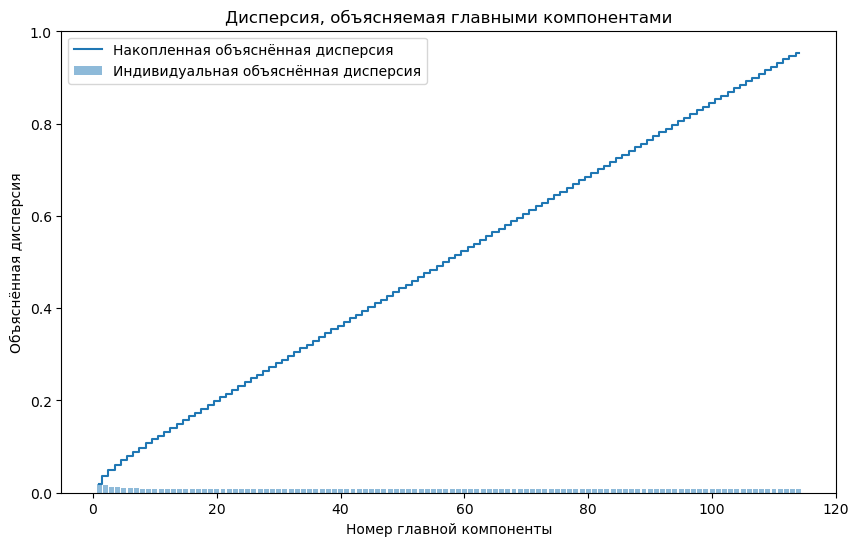

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Индивидуальная объяснённая дисперсия')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Накопленная объяснённая дисперсия')
plt.ylabel('Объяснённая дисперсия')
plt.xlabel('Номер главной компоненты')
plt.legend(loc='best')
plt.title('Дисперсия, объясняемая главными компонентами')
plt.show()

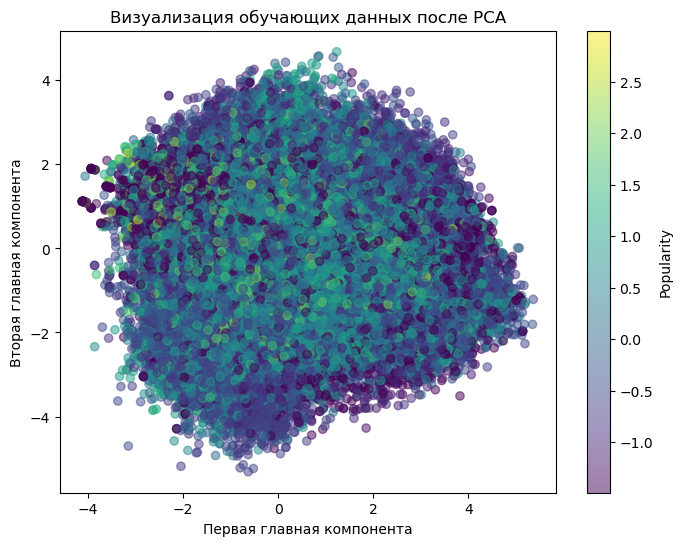

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, c=y_train, cmap='viridis')
plt.title('Визуализация обучающих данных после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Popularity')
plt.show()

In [21]:
knn_pca = KNeighborsRegressor(n_neighbors=best_k)

knn_pca.fit(X_train_pca, y_train)

y_train_pred_knn_pca = knn_pca.predict(X_train_pca)
y_test_pred_knn_pca = knn_pca.predict(X_test_pca)

mse_train_knn_pca = mean_squared_error(y_train, y_train_pred_knn_pca)
r2_train_knn_pca = r2_score(y_train, y_train_pred_knn_pca)

mse_test_knn_pca = mean_squared_error(y_test, y_test_pred_knn_pca)
r2_test_knn_pca = r2_score(y_test, y_test_pred_knn_pca)

print(f"KNN на данных после PCA:")
print(f"Ошибки на обучающей выборке: MSE = {mse_train_knn_pca:.2f}, R² = {r2_train_knn_pca:.2f}")
print(f"Ошибки на тестовой выборке: MSE = {mse_test_knn_pca:.2f}, R² = {r2_test_knn_pca:.2f}")

KNN на данных после PCA:
Ошибки на обучающей выборке: MSE = 0.66, R² = 0.34
Ошибки на тестовой выборке: MSE = 0.70, R² = 0.30


In [24]:
rf_pca = RandomForestRegressor(n_estimators=100, random_state=42)

rf_pca.fit(X_train_pca, y_train)

y_train_pred_rf_pca = rf_pca.predict(X_train_pca)
y_test_pred_rf_pca = rf_pca.predict(X_test_pca)

mse_train_rf_pca = mean_squared_error(y_train, y_train_pred_rf_pca)
r2_train_rf_pca = r2_score(y_train, y_train_pred_rf_pca)

mse_test_rf_pca = mean_squared_error(y_test, y_test_pred_rf_pca)
r2_test_rf_pca = r2_score(y_test, y_test_pred_rf_pca)

print(f"Случайный лес на данных после PCA:")
print(f"Ошибки на обучающей выборке: MSE = {mse_train_rf_pca:.2f}, R² = {r2_train_rf_pca:.2f}")
print(f"Ошибки на тестовой выборке: MSE = {mse_test_rf_pca:.2f}, R² = {r2_test_rf_pca:.2f}")


Случайный лес на данных после PCA:
Ошибки на обучающей выборке: MSE = 0.11, R² = 0.89
Ошибки на тестовой выборке: MSE = 0.60, R² = 0.40


# 11. Выводы

На данном датасете лучше всех показала себя модель Случайного леса, объясняя 51% вариативности данных на тестовой выборке.


Хуже всех показала себя Линейная регрессия (объясняет только 26% вариативности данных). Скорее всего это произошло из-за нелинейных зависимостях в данных

PCA не смог добиться улучшения качества моделей